In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return x**2 - 4*x + 10

In [4]:
f(2.0)

6.0

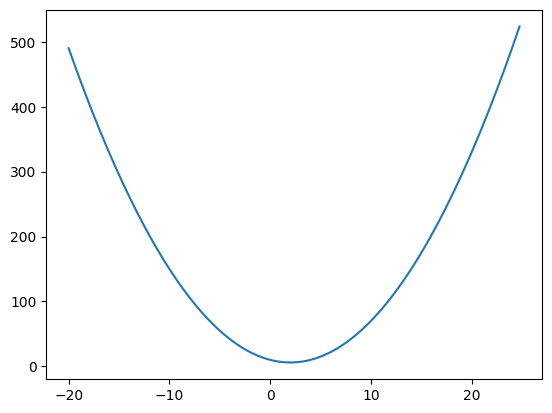

In [5]:
xs = np.arange(-20,25, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [9]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data                  # This stores the actual numeric value
        self._prev = set(_children)      # This keeps track of which Value objects were used to compute this one (for backpropagation)
        self._op = _op                   # This stores the operation that produced this Value ('+', '-', '*', etc.) — useful for visualizing the computation graph
        self.grad = 0.0                  # This stores the gradient of this Value with respect to some scalar value (for backpropagation)
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"  # Used to print the object nicely
    
    # When we perform the operations listed below on an two Value objects, we return a new Value that contains:
        # - the result of the addition
        # - a reference to the inputs (self and other) as children
        # - the operation used to create this node ('+')
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        return out
    

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f ; L.label = 'L'
L.data

-8.0

In [11]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


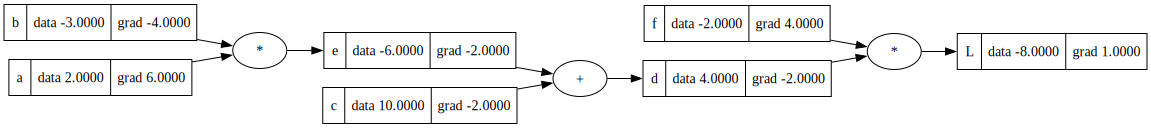

In [34]:
draw_dot(L)

In [27]:
def lol():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    a.data = a.data + h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1) / h)

lol()


6.000000000000227
